<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/master/Model_2_1_final_fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
print(tf.__version__)

2.2.0-rc2


In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [56]:
len(train_images),  len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)

In [57]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
train_images = train_images/255
test_images = test_images/255

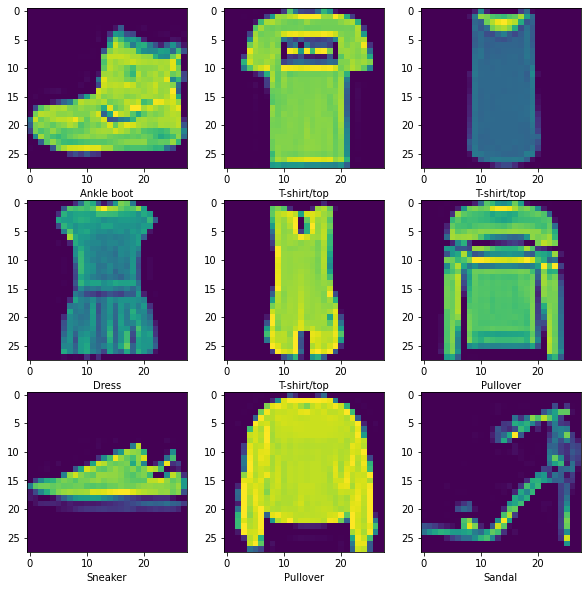

In [59]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])


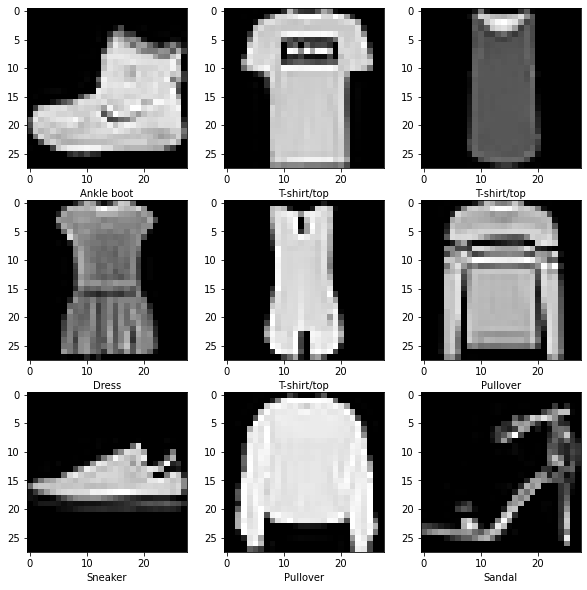

In [60]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_images[i], cmap= 'gray')
  plt.xlabel(class_names[train_labels[i]])


In [0]:
from sklearn.model_selection import train_test_split

training_images, validating_images, training_labels, validating_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 12345)

In [62]:
len(training_images),  len(training_labels), len(validating_images), len(validating_labels), len(test_images), len(test_labels)

(48000, 48000, 12000, 12000, 10000, 10000)

In [63]:
print(training_images.shape)
print(training_labels.shape)
print(validating_images.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)


In [0]:
cnn_model = models.Sequential()


cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
#cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(82, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
#cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(60, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
#cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 40, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [65]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 82)        47314     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 82)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 60)          44340     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 60)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 60)               

In [0]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [0]:
# * unpack the tuple
training_images = training_images.reshape(training_images.shape[0], *(28, 28, 1))
test_images = test_images.reshape(test_images.shape[0], *(28, 28, 1))
validating_images = validating_images.reshape(validating_images.shape[0], *(28, 28, 1))

In [68]:
epochs = 70

history = cnn_model.fit(training_images, training_labels, batch_size = 100, epochs = epochs,
                        verbose = 1, validation_data = (validating_images, validating_labels))
#history = cnn_model.fit(X_train, y_train, batch_size = 100, epochs = epochs,
 #                       verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/70
480/480 [==============================] - 3s 6ms/step - loss: 0.7824 - accuracy: 0.7192 - val_loss: 0.5146 - val_accuracy: 0.8170
Epoch 2/70
480/480 [==============================] - 3s 5ms/step - loss: 0.4992 - accuracy: 0.8198 - val_loss: 0.4495 - val_accuracy: 0.8362
Epoch 3/70
480/480 [==============================] - 3s 5ms/step - loss: 0.4343 - accuracy: 0.8431 - val_loss: 0.4013 - val_accuracy: 0.8511
Epoch 4/70
480/480 [==============================] - 3s 5ms/step - loss: 0.3930 - accuracy: 0.8554 - val_loss: 0.3921 - val_accuracy: 0.8552
Epoch 5/70
480/480 [==============================] - 3s 5ms/step - loss: 0.3612 - accuracy: 0.8668 - val_loss: 0.3646 - val_accuracy: 0.8680
Epoch 6/70
480/480 [==============================] - 3s 5ms/step - loss: 0.3430 - accuracy: 0.8734 - val_loss: 0.3268 - val_accuracy: 0.8814
Epoch 7/70
480/480 [==============================] - 3s 5ms/step - loss: 0.3215 - accuracy: 0.8813 - val_loss: 0.3299 - val_accuracy: 0.8792
Epoch 

In [69]:
evaluation = cnn_model.evaluate(test_images, test_labels)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.7042 - accuracy: 0.8844
Test Accuracy : 0.884


In [21]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(test_images)
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

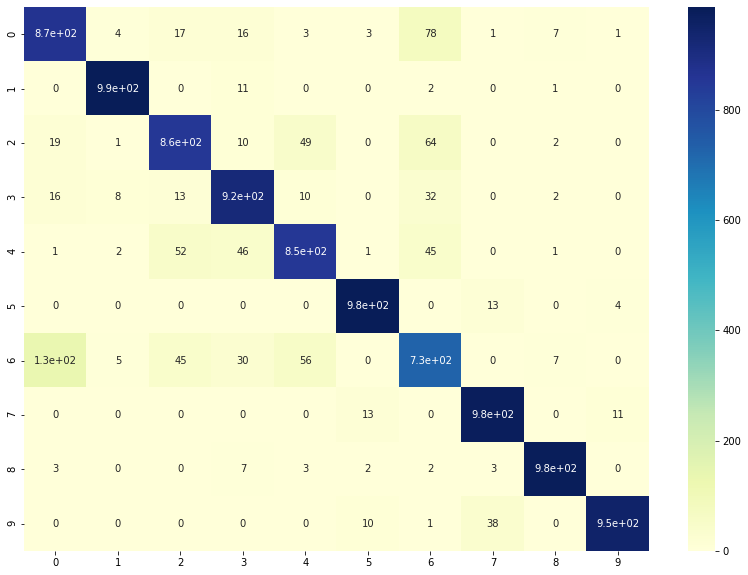

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, cmap ="YlGnBu", annot= True )
# Sum the diagonal element to get the total true correct values

In [35]:
cm

array([[870,   4,  17,  16,   3,   3,  78,   1,   7,   1],
       [  0, 986,   0,  11,   0,   0,   2,   0,   1,   0],
       [ 19,   1, 855,  10,  49,   0,  64,   0,   2,   0],
       [ 16,   8,  13, 919,  10,   0,  32,   0,   2,   0],
       [  1,   2,  52,  46, 852,   1,  45,   0,   1,   0],
       [  0,   0,   0,   0,   0, 983,   0,  13,   0,   4],
       [131,   5,  45,  30,  56,   0, 726,   0,   7,   0],
       [  0,   0,   0,   0,   0,  13,   0, 976,   0,  11],
       [  3,   0,   0,   7,   3,   2,   2,   3, 980,   0],
       [  0,   0,   0,   0,   0,  10,   1,  38,   0, 951]])

In [36]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(test_labels, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.87      0.85      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.87      0.85      0.86      1000
     Class 3       0.88      0.92      0.90      1000
     Class 4       0.88      0.85      0.86      1000
     Class 5       0.97      0.98      0.98      1000
     Class 6       0.76      0.73      0.74      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



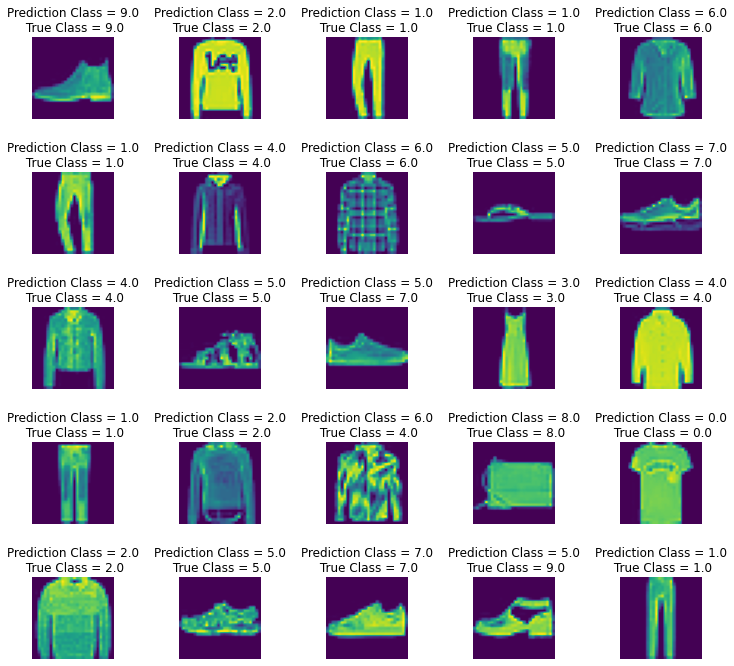

In [40]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(test_images[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {test_labels[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.8)